# Upper Confidence Bound (UCB)

## Importing the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing the dataset

In [17]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [26]:
# by changing N we can find how many rounds needed to find best ad
N = dataset.shape[0] # get all data in dataset # (result ad 5 (Index 4) )
#N = 5000 # (result ad 5 (Index 4) )
#N = 1000 # (result ad 5 (Index 4) )
#N = 500 # (result ad 8 (Index 7) ) # regred : because the real best ad is ad 5 (Index 4)

d = dataset.shape[1]
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0 # start with ad number 1 (index 0)
    max_upper_bound = 0 # maximum upper confident bound
    for i in range(0, d):
        if(numbers_of_selections[i] > 0):# ri(n) = Ri(N)/Ni(n) and need to make sure Ni(n) != 0
            # r_i(n) = R_i(N)/N_i(n)
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            # Delta_i(n) = sqrt( 3*log(n) / 2*N_i(n) )
            delta_i = math.sqrt( (3*math.log(n + 1)) / (2*numbers_of_selections[i]) ) # n+1 due to log(0) = infinity so n = 1 to 1001
            # confident interval = r_i(n) - Delta_i(n) : r_i(n) + Delta_i(n)
            # UCB = upper confident bound = r_i(n) + Delta_i(n)
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # first few runs if ad not selected make UCB to very high value so next time this will selected
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound # update max upper bound
            ad = i # select the maximum upper bound ad
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

## Visualising the results

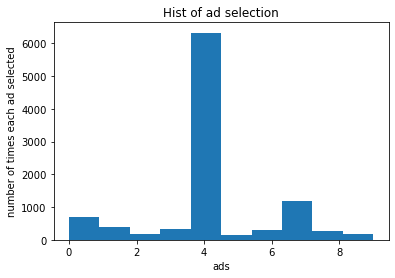

In [27]:
plt.hist(ads_selected)
plt.title("Hist of ad selection")
plt.xlabel("ads")
plt.ylabel("number of times each ad selected")
plt.show()